## Linear regression with statsmodels (OLS)

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as eval_measures
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn import datasets, model_selection, metrics

We load the boston house-prices dataset and `X` are our features and `y` is the target variable `medv` (Median value of owner-occupied homes in $1000s).

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Let's split the data in a test and training set.

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

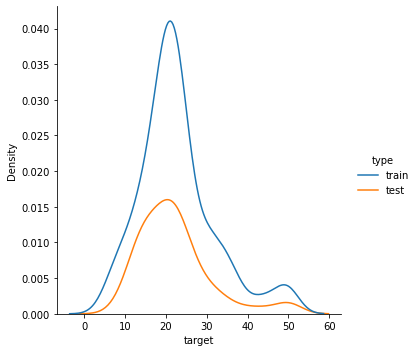

In [4]:
df_train = pd.DataFrame(y_train, columns=['target'])
df_train['type'] = 'train'

df_test = pd.DataFrame(y_test, columns=['target'])
df_test['type'] = 'test'

df_set = df_train.append(df_test)

_ = sns.displot(df_set, x="target" ,hue="type", kind="kde", log_scale=False)

## Fitting models - the standard way
### Full model without an intercept


In [5]:
model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              629.7
Date:                Wed, 10 Mar 2021   Prob (F-statistic):                   2.49e-229
Time:                        19:12:51   Log-Likelihood:                         -1065.6
No. Observations:                 354   AIC:                                      2157.
Df Residuals:                     341   BIC:                                      2208.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

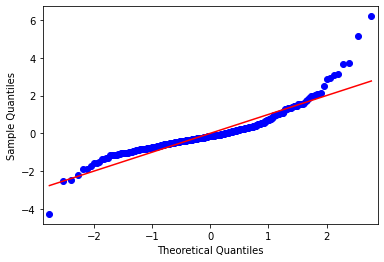

In [6]:
fig = sm.qqplot(result.resid, fit=True, line="s")
plt.show()

In [7]:
result.pvalues < 0.05

CRIM        True
ZN          True
INDUS      False
CHAS        True
NOX        False
RM          True
AGE        False
DIS         True
RAD         True
TAX        False
PTRATIO     True
B           True
LSTAT       True
dtype: bool

In [8]:
predicted = result.predict(X_test)

print("r2 score: {}".format(metrics.r2_score(y_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error(y_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(y_test, predicted)))

r2 score: 0.679617133781487
mse: 25.47415588090963
rmse: 5.047192871380053
mae: 3.2877976687052963


### Full model with an intercept


In [9]:
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.92
Date:                Wed, 10 Mar 2021   Prob (F-statistic):           4.10e-92
Time:                        19:12:51   Log-Likelihood:                -1050.5
No. Observations:                 354   AIC:                             2129.
Df Residuals:                     340   BIC:                             2183.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.2064      6.572      5.509      0.0

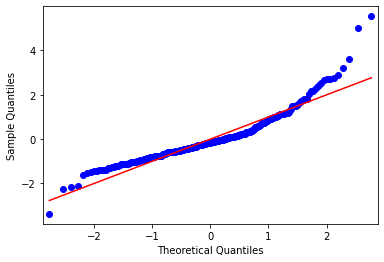

In [10]:
fig = sm.qqplot(result.resid, fit=True, line="s")
plt.show()

In [11]:
predicted = result.predict(sm.add_constant(X_test))

print("r2 score: {}".format(metrics.r2_score(y_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error(y_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(y_test, predicted)))

r2 score: 0.7227311642495549
mse: 22.046090123957548
rmse: 4.6953264129299415
mae: 3.2171151647291953


## Fitting models using R-style formulas
We can also fit a model with the R syntax `y ~ x_1 + x_2` and build some complexer models.

In [12]:
dat = X_train.copy()
dat['MEDV'] = y_train
dat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
357,3.84970,0.0,18.10,1.0,0.770,6.395,91.0,2.5052,24.0,666.0,20.2,391.34,13.27,21.7
57,0.01432,100.0,1.32,0.0,0.411,6.816,40.5,8.3248,5.0,256.0,15.1,392.90,3.95,31.6
236,0.52058,0.0,6.20,1.0,0.507,6.631,76.5,4.1480,8.0,307.0,17.4,388.45,9.54,25.1


### Full model with an intercept

In [13]:
result = smf.ols('MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B', data=dat).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 10 Mar 2021   Prob (F-statistic):           4.90e-80
Time:                        19:12:52   Log-Likelihood:                -1082.1
No. Observations:                 354   AIC:                             2190.
Df Residuals:                     341   BIC:                             2240.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1460      6.800      2.816      0.0

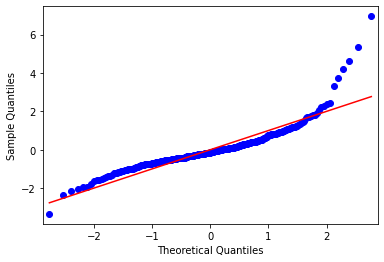

In [14]:
fig = sm.qqplot(result.resid, fit=True, line="s")

plt.show()

In [15]:
predicted = result.predict(X_test)

print("r2 score: {}".format(metrics.r2_score(y_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error(y_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(y_test, predicted)))

r2 score: 0.6375304422258596
mse: 28.820536272140004
rmse: 5.368476159222467
mae: 3.609560071529999


### Model with a polynomial and the target variable log transformed

In [16]:
result = smf.ols('np.log(MEDV) ~ CRIM + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + pow(AGE, 2)', data=dat).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     93.33
Date:                Wed, 10 Mar 2021   Prob (F-statistic):           1.49e-91
Time:                        19:12:52   Log-Likelihood:                 34.498
No. Observations:                 354   AIC:                            -47.00
Df Residuals:                     343   BIC:                            -4.433
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.9052      0.289     10.062      

Let's plot the QQ-Plot for the residuals

In [17]:
result.pvalues < 0.05

Intercept      True
CRIM           True
CHAS           True
NOX            True
RM             True
DIS            True
RAD            True
TAX            True
PTRATIO        True
B              True
pow(AGE, 2)    True
dtype: bool

In [18]:
predicted = np.exp(result.predict(X_test))

print("r2 score: {}".format(metrics.r2_score(y_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error(y_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(y_test, predicted)))

r2 score: 0.703179479837343
mse: 23.600675930401202
rmse: 4.858052689133909
mae: 3.1479017985320303


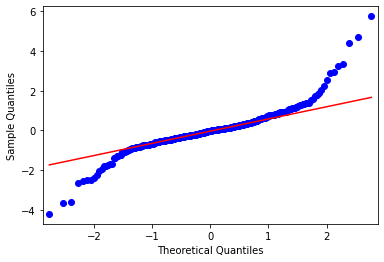

In [19]:
fig = sm.qqplot(result.resid, fit=True, line="q")
plt.show()